# **Next-word Prediction** #

The objective of the project is to predict the next word for a given incomplete sentence. I have used shakespear's poetry text to train the model . First we will train with a single song later we will train with multiple songs .

The LSTM model is used along with other neural network layers.

## **With Single song** ##

### **Data Preprocessing** ###

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


#### **Collection** ####
One of the shakespear's songs

In [2]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

#### **Tokenization** ####

In [4]:
tokenizer = Tokenizer()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

In [5]:
corpus

['in the town of athy one jeremy lanigan ',
 ' battered away til he hadnt a pound. ',
 'his father died and made him a man again ',
 ' left him a farm and ten acres of ground. ',
 'he gave a grand party for friends and relations ',
 'who didnt forget him when come to the wall, ',
 'and if youll but listen ill make your eyes glisten ',
 'of the rows and the ructions of lanigans ball. ',
 'myself to be sure got free invitation, ',
 'for all the nice girls and boys i might ask, ',
 'and just in a minute both friends and relations ',
 'were dancing round merry as bees round a cask. ',
 'judy odaly, that nice little milliner, ',
 'she tipped me a wink for to give her a call, ',
 'and i soon arrived with peggy mcgilligan ',
 'just in time for lanigans ball. ',
 'there were lashings of punch and wine for the ladies, ',
 'potatoes and cakes; there was bacon and tea, ',
 'there were the nolans, dolans, ogradys ',
 'courting the girls and dancing away. ',
 'songs they went round as plenty as wat

In [ ]:
total_words

263

#### **Feature Extraction** ####
Here we take line by line from corpus and get the sequence for that line .

**Ex:** "she took a small drop too much, i suppose. " will be converted into [5,7,12,109,100,3,45,66,12].

Now using n_gram_sequnce and pre-padding we will make set of sequences from this sequence.

**9-sequences if max_length = 9**<br>
1. [0,0,0,0,0,0,0,0,5]
2. [0,0,0,0,0,0,0,5,7]
3. [0,0,0,0,0,0,5,7,12]
4. [0,0,0,0,0,5,7,12,109]
5. [0,0,0,0,5,7,12,109,100]
6. [0,0,0,5,7,12,109,100,3]
7. [0,0,5,7,12,109,100,3,45]
8. [0,5,7,12,109,100,3,45,66]
9. [5,7,12,109,100,3,45,66,12]

Repeat this for all lines in the corpus and append it to a list.


In [6]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])

In [8]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

#### **Separate input-output** ####
xs is the set of tokens in a sequence except the last token and the ys is the last token.

In [9]:
xs = input_sequences[:,:-1]
ys = input_sequences[:,-1]
print(xs[1])
print(ys[1])

[0 0 0 0 0 0 0 0 4 2]
66


since it is a classification problem we have to encode(one-hot encoding) the output or the labels into different classes, here it is done by keras. example if ys = 18 and total words = 97 the encoded ys is a array of length 97 where all elements are '0's except the element at ys'th index. It is set to 1.

In [10]:
ys = tf.keras.utils.to_categorical(ys,num_classes=total_words)

In [ ]:
ys[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### **Model implementation** ###

#### **Model Creation** ####

Here we are using single direction LSTM so the attention or the relationship will be applied to later words but not earlier words

In [12]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(total_words,64,input_length = max_sequence_len -1))
model1.add(tf.keras.layers.LSTM(20))
model1.add(tf.keras.layers.Dense(total_words,activation = 'softmax'))

#### **Model train** ####

In [13]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history1 = model1.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 6s 183ms/step - loss: 5.5697 - accuracy: 0.0177
Epoch 2/500
15/15 [==============================] - 1s 80ms/step - loss: 5.5547 - accuracy: 0.0640
Epoch 3/500
15/15 [==============================] - 1s 61ms/step - loss: 5.5282 - accuracy: 0.0596
Epoch 4/500
15/15 [==============================] - 1s 37ms/step - loss: 5.4474 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 16ms/step - loss: 5.2921 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 17ms/step - loss: 5.1845 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 1s 37ms/step - loss: 5.1136 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 16ms/step - loss: 5.0723 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 1s 50ms/step - loss: 5.0401 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 26ms/step - loss: 5.0133 - accuracy: 0.050

#### **Training Visualization** ####

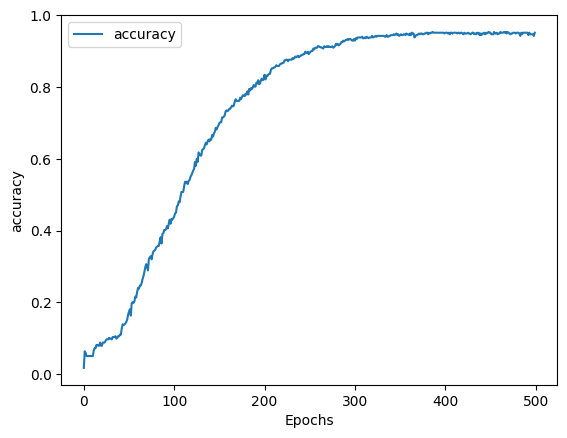

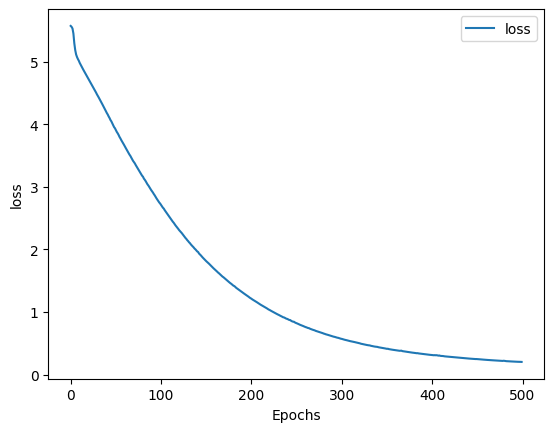

In [15]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

#### **Model Testing** ####
Since we don't have test dataset and here testing doesn't make any sense so we will predict next words instead of testing and check the prediction quality

Single word

In [16]:
seed_text = "Lawrence went to dublin"
token_list_seed =  tokenizer.texts_to_sequences([seed_text])[0]
token_list_seed = pad_sequences([token_list_seed],maxlen=max_sequence_len-1,padding='pre')
token_list_seed

array([[  0,   0,   0,   0,   0,   0,   0, 134,  13,  59]], dtype=int32)

In [17]:
probabilities = model1.predict(token_list_seed)
predicted = np.argmax(probabilities,axis = -1)[0]
predicted

1/1 [==============================] - 0s 374ms/step


31

In [18]:
output_word = tokenizer.index_word[predicted]
seed_text = seed_text +" "+ output_word
seed_text

'Lawrence went to dublin up'

10 words

In [20]:
seed_text = 'Lawrence went to dublin'
next_words = 10

# Ensure the input sequence has the correct length
token_list_seed = tokenizer.texts_to_sequences([seed_text])[0]
token_list_seed = pad_sequences([token_list_seed], maxlen=max_sequence_len - 1, padding='pre')  # Adjust maxlen

for _ in range(next_words):
    probabilities = model1.predict(token_list_seed)
    predicted = np.argmax(probabilities, axis=-1)[0]
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

   # Update the input sequence for the next iteration
   # token_list_seed = tokenizer.texts_to_sequences([seed_text])[0]
    #token_list_seed = pad_sequences([token_list_seed], maxlen=max_sequence_len - 1, padding='pre')  # Adjust maxlen

print(seed_text)


1/1 [==============================] - 0s 17ms/step
Lawrence went to dublin up up up up up up up up up up


#### **Use the Bidirectional LSTM** ####
we have seen single direction LSTM let's go for the bidirectional LSTM

In [22]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(total_words,64,input_length = max_sequence_len -1))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model2.add(tf.keras.layers.Dense(total_words,activation = 'softmax'))

In [23]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history2 = model2.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 6s 93ms/step - loss: 5.5680 - accuracy: 0.0066
Epoch 2/500
15/15 [==============================] - 1s 41ms/step - loss: 5.5433 - accuracy: 0.0640
Epoch 3/500
15/15 [==============================] - 1s 46ms/step - loss: 5.4905 - accuracy: 0.0640
Epoch 4/500
15/15 [==============================] - 1s 40ms/step - loss: 5.3345 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 27ms/step - loss: 5.1441 - accuracy: 0.0375
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0678 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 14ms/step - loss: 5.0321 - accuracy: 0.0486
Epoch 8/500
15/15 [==============================] - 0s 20ms/step - loss: 5.0049 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 21ms/step - loss: 4.9698 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9359 - accuracy: 0.0618
E

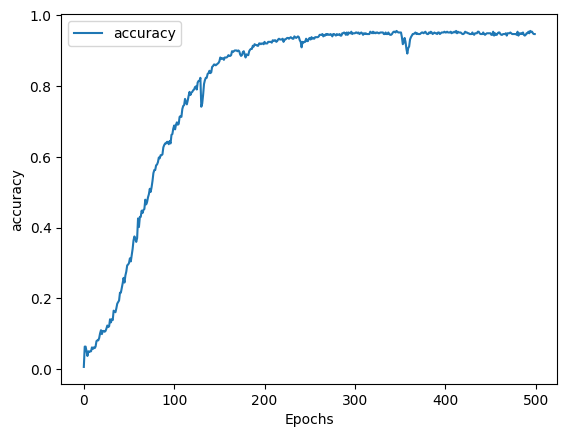

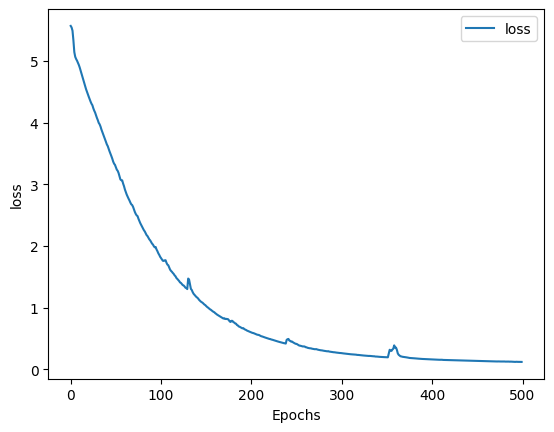

In [24]:
# Plot the accuracy and results
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [25]:
seed_text = 'Lawrence went to dublin'
next_words = 10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	probabilities = model.predict(token_list)
	predicted = np.argmax(probabilities, axis=-1)[0]
	if predicted != 0:
		output_word = tokenizer.index_word[predicted]
		seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
Lawrence went to dublin the dancing girls girls girls cried kerrigan small no no


**Bidirectional LSTM some what better than single directional LSTM**

# **Train Multiple songs** #

## **Data Preprocessing** ##

### **Data collection** ##
This dataset contains multiple songs.
Link : https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt

In [26]:
data = open('/content/Laurences_generated_poetry.txt').read()

### **Feature Extraction and Tokenization** ###

In [27]:
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))
xs = input_sequences[:,:-1]
ys = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(ys,num_classes=total_words)

## **Model Implementation** ##

### **Model Creation** ###
Since Bidirectional LSTM is better,let's use that instead of single directional LSTM.

In [28]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(total_words,100,input_length = max_sequence_len -1))
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model3.add(tf.keras.layers.Dense(total_words,activation = 'softmax'))
adam = tf.keras.optimizers.Adam(lr=0.01)

### **Model Training** ###

In [29]:
model3.compile(loss="categorical_crossentropy",optimizer=adam,metrics=['accuracy'])
history3 = model3.fit(xs,ys,epochs=100,verbose=1)

Epoch 1/100
377/377 [==============================] - 17s 35ms/step - loss: 6.7531 - accuracy: 0.0641
Epoch 2/100
377/377 [==============================] - 5s 13ms/step - loss: 6.2178 - accuracy: 0.0758
Epoch 3/100
377/377 [==============================] - 5s 12ms/step - loss: 5.9419 - accuracy: 0.0853
Epoch 4/100
377/377 [==============================] - 5s 12ms/step - loss: 5.6385 - accuracy: 0.0982
Epoch 5/100
377/377 [==============================] - 6s 16ms/step - loss: 5.2992 - accuracy: 0.1170
Epoch 6/100
377/377 [==============================] - 4s 11ms/step - loss: 4.9480 - accuracy: 0.1351
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 4.5888 - accuracy: 0.1550
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 4.2446 - accuracy: 0.1820
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 3.9074 - accuracy: 0.2147
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 3.594

### **Training Visualization** ###

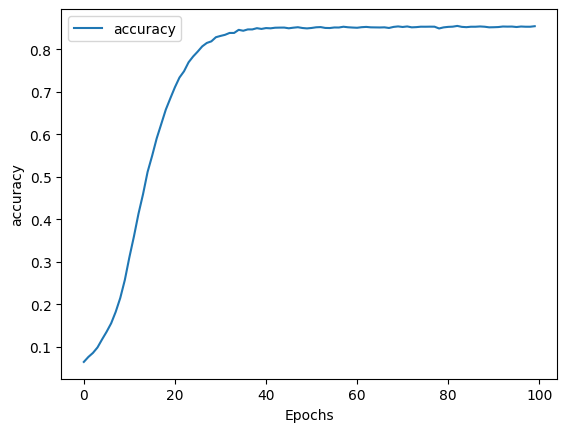

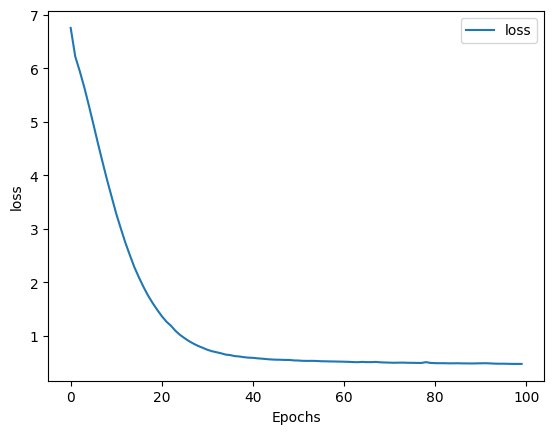

In [30]:
# Plot the accuracy and results
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

### **Prediction** ###

In [32]:
seed_text = "help me obi-wan kinobi youre my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	probabilities = model3.predict(token_list, verbose=0)
	predicted = np.argmax(probabilities, axis=-1)[0]
	if predicted != 0:
		output_word = tokenizer.index_word[predicted]
		seed_text += " " + output_word

# Print the result
print(seed_text)

help me obi-wan kinobi youre my only hope and our roddy might as she star of the toome of doneen beautiful hair in my hair young strength died fearless more sweetly bride in their town to killarney you would there to me mothers true to love be my rest again love do not boy the heart in in killarney home i started them in thou by back thou art thou art art thou art craw craw bouys truly hurroo odaly strayed of pail put me in the autumn down oer the bridge of toome today by by by toome side by side by side by yore thou art


### **Pick random from 3 possible prediction** ###

In [34]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  probabilities = model3.predict(token_list, verbose=0)
  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities)[0][-choice]
  if predicted != 0:
	  output_word = tokenizer.index_word[predicted]
	  seed_text += " " + output_word

# Print the result
print(seed_text)


help me obi-wan kinobi youre my only hope to save her bit by skibbereen thou bloom ghosts and goblins agin his comrades thou away by back by today in heavem my fathers father say my eyes ive bubblin art art fathers slainte and gathers shall still not go forget you say them ranks of those said that i do be true star better to me and said she said she put me to me home he nelly grey far to fray to keep ye go home hung your high rocky break in red now you did join remark down by the scruff down by by day white smile


## **Conclusion** ##
We have implemented 3 models . Among three 2 ere trained with Single song and the last one is trained with Multiple songs. Among all The last Model(Bidirectional and Multiple songs) predicted better compared to other two.